# **3. Dog vs Cat Classification **



---



Extracting Dataset using Kaggle API

In [23]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



---



Importing the Dog vs Cat Dataset from Kaggle

In [25]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [27]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [28]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [29]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000




---



Printing the name of images

In [30]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.7106.jpg', 'cat.4505.jpg', 'dog.12176.jpg', 'cat.1757.jpg', 'dog.3643.jpg', 'dog.2399.jpg', 'dog.9373.jpg', 'dog.3865.jpg', 'dog.6573.jpg', 'cat.6362.jpg', 'dog.7173.jpg', 'cat.9442.jpg', 'dog.10273.jpg', 'cat.7384.jpg', 'dog.3165.jpg', 'cat.2736.jpg', 'dog.5429.jpg', 'dog.348.jpg', 'cat.8931.jpg', 'cat.4529.jpg', 'cat.3957.jpg', 'dog.10216.jpg', 'dog.6662.jpg', 'dog.212.jpg', 'cat.8027.jpg', 'dog.9499.jpg', 'cat.3219.jpg', 'cat.10259.jpg', 'cat.1628.jpg', 'cat.4856.jpg', 'cat.11196.jpg', 'cat.6711.jpg', 'cat.929.jpg', 'dog.11925.jpg', 'dog.2209.jpg', 'cat.7224.jpg', 'dog.4236.jpg', 'dog.2314.jpg', 'cat.1112.jpg', 'dog.11850.jpg', 'cat.515.jpg', 'dog.10450.jpg', 'dog.4726.jpg', 'dog.6959.jpg', 'dog.6505.jpg', 'dog.7656.jpg', 'cat.9586.jpg', 'dog.4727.jpg', 'dog.3181.jpg', 'cat.380.jpg', 'cat.689.jpg', 'dog.11731.jpg', 'dog.5595.jpg', 'cat.9787.jpg', 'dog.4278.jpg', 'cat.8437.jpg', 'dog.8076.jpg', 'dog.12255.jpg', 'cat.7907.jpg', 'dog.6177.jpg', 'cat.12314.jpg', 'cat.3870.jpg', 'c



---



Importing the Dependencies

In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 



---



Displaying the images of dogs and cats

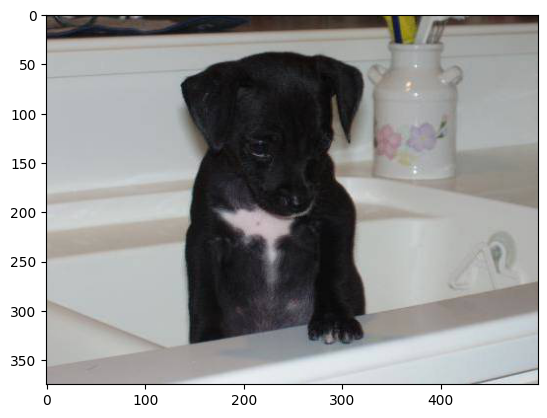

In [32]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

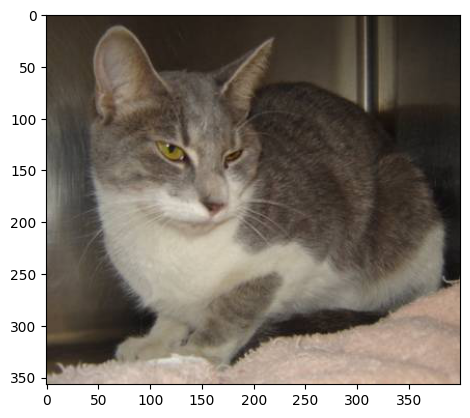

In [33]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [34]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



cat
cat
dog
cat
dog




---



In [35]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500




---



Resizing all the images

In [41]:
#creating a directory for resized images
os.mkdir('/content/image resized1')

In [42]:
original_folder = '/content/train/'
resized_folder = '/content/image resized1/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

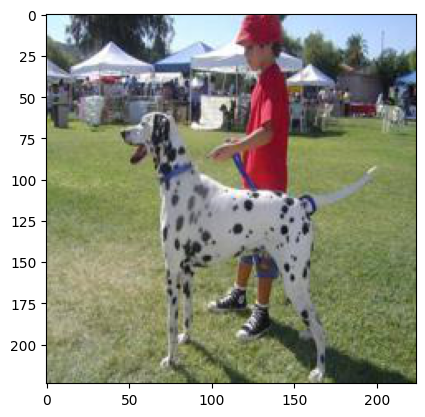

In [44]:
# display resized dog image
img = mpimg.imread('/content/image resized1/dog.10004.jpg')
imgplt = plt.imshow(img)
plt.show()

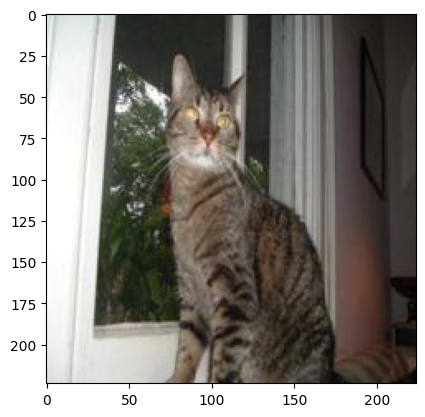

In [45]:
# display resized cat image
img = mpimg.imread('/content/image resized1/cat.4354.jpg')
imgplt = plt.imshow(img)
plt.show()



---



Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [46]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized1/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [47]:
print(filenames[0:5])
print(len(filenames))

['cat.7106.jpg', 'cat.4505.jpg', 'dog.12176.jpg', 'cat.1757.jpg', 'dog.3643.jpg']
2000


In [48]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]




---



Converting all the resized images to numpy arrays

In [49]:
import cv2
import glob

In [50]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [51]:
print(dog_cat_images)

[[[[ 74  67  74]
   [ 71  64  71]
   [ 69  61  68]
   ...
   [ 73  71  90]
   [ 67  66  82]
   [ 61  60  76]]

  [[ 72  68  74]
   [ 71  67  73]
   [ 73  66  73]
   ...
   [ 75  73  92]
   [ 69  68  84]
   [ 64  63  79]]

  [[ 90  87  96]
   [ 91  88  97]
   [ 94  89  98]
   ...
   [ 69  67  86]
   [ 64  63  79]
   [ 61  60  76]]

  ...

  [[ 63 100  90]
   [  8  32  24]
   [  4   5   3]
   ...
   [ 43   8  12]
   [ 45  10  14]
   [ 48  13  17]]

  [[ 46  46  40]
   [ 20  14   9]
   [ 19   0   0]
   ...
   [ 32  14  15]
   [ 29  14  12]
   [ 27  14  12]]

  [[ 22   3   0]
   [ 44  21  19]
   [ 41  10   9]
   ...
   [ 28  16  16]
   [ 20  15  12]
   [ 16  13   9]]]


 [[[161 173 177]
   [154 166 170]
   [147 159 163]
   ...
   [149 156 159]
   [149 156 159]
   [149 156 159]]

  [[161 173 177]
   [153 165 169]
   [147 159 163]
   ...
   [149 156 159]
   [149 156 159]
   [149 156 159]]

  [[161 173 177]
   [153 165 169]
   [147 159 163]
   ...
   [149 156 159]
   [149 156 159]
   [149 156

In [52]:
type(dog_cat_images)

numpy.ndarray

In [53]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [54]:
X = dog_cat_images
Y = np.asarray(labels)



---



Train Test Split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images



---



Scaling data

In [57]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [58]:
print(X_train_scaled)

[[[[0.20784314 0.35686275 0.49411765]
   [0.21176471 0.36078431 0.49803922]
   [0.21960784 0.36862745 0.50588235]
   ...
   [0.38039216 0.4745098  0.59215686]
   [0.38431373 0.47843137 0.59607843]
   [0.38823529 0.48235294 0.6       ]]

  [[0.20784314 0.35686275 0.49411765]
   [0.21568627 0.36470588 0.50196078]
   [0.21960784 0.36862745 0.50588235]
   ...
   [0.36862745 0.4627451  0.58039216]
   [0.36862745 0.4627451  0.58039216]
   [0.36862745 0.4627451  0.58039216]]

  [[0.21176471 0.36078431 0.49803922]
   [0.21568627 0.36470588 0.50196078]
   [0.21960784 0.36862745 0.50588235]
   ...
   [0.36470588 0.45882353 0.57647059]
   [0.36470588 0.45882353 0.57647059]
   [0.36862745 0.4627451  0.58039216]]

  ...

  [[0.71372549 0.75686275 0.78823529]
   [0.7254902  0.76862745 0.8       ]
   [0.71764706 0.76078431 0.79215686]
   ...
   [0.7372549  0.76470588 0.75294118]
   [0.71764706 0.74509804 0.73333333]
   [0.70196078 0.72941176 0.71764706]]

  [[0.70588235 0.74901961 0.78039216]
   [0.7



---



Building the Neural Network

In [59]:
import tensorflow as tf
import tensorflow_hub as hub

In [60]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [61]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [62]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [64]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 37s 735ms/step - loss: 0.0342 - acc: 0.9925
Epoch 2/10
50/50 [==============================] - 36s 723ms/step - loss: 0.0293 - acc: 0.9950
Epoch 3/10
50/50 [==============================] - 36s 717ms/step - loss: 0.0265 - acc: 0.9944
Epoch 4/10
50/50 [==============================] - 36s 724ms/step - loss: 0.0219 - acc: 0.9975
Epoch 5/10
50/50 [==============================] - 35s 699ms/step - loss: 0.0194 - acc: 0.9987
Epoch 6/10
50/50 [==============================] - 36s 720ms/step - loss: 0.0178 - acc: 0.9994
Epoch 7/10
50/50 [==============================] - 36s 720ms/step - loss: 0.0163 - acc: 0.9987
Epoch 8/10
50/50 [==============================] - 36s 714ms/step - loss: 0.0145 - acc: 0.9994
Epoch 9/10
50/50 [==============================] - 36s 719ms/step - loss: 0.0130 - acc: 0.9994
Epoch 10/10
50/50 [==============================] - 37s 741ms/step - loss: 0.0118 - acc: 0.9994


In [65]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 795ms/step - loss: 0.0435 - acc: 0.9850
Test Loss = 0.043458305299282074
Test Accuracy = 0.9850000143051147




---



Predictive System.

Path of the image to be predicted: /content/image resized/cat.9968.jpg


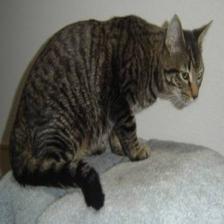

1/1 [==============================] - 0s 371ms/step
[[ 4.5881085 -4.8053207]]
0
The image represents a Cat


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')